# MLG / Introduction to jupyter notebooks - 2

In this laboratory you are going to learn how to perform interactive computing using **jupyter**. The **jupyter** project, born out of the IPython Project in 2014, evolved to support interactive data science and scientific computing across all programming languages. It was initially an interactive shell for python that has more functionnalities than the basic one, now it allows you to interact with your scripts using so called **notebooks**. The notebook extends the console-based approach to interactive computing in a qualitatively new direction, providing a web-based application suitable for capturing the whole computation process: developing, documenting, and executing code, as well as communicating the results.

This guide does not start from the basics of the general purpose language **python**. If you do not know this language, it is recommended to follow a **python** tutorial in order to learn the basic concepts and commands. You can have a look at the [official python tutorial](https://docs.python.org/3/tutorial/index.html) or [Google's python tutorial](https://developers.google.com/edu/python/) for example.

Note that for this course, we will use the Python 3.X series.

You will use a browser-based notebook to interactively explore a dataset by:
- Reading raw data from ascii files
- Reading typed data (data frames) from ascii files
- Selecting specific columns and/or rows from a dataset
- Filtering datasets
- Plotting the information in the dataset (e.g., scatter-plot, boxplot, histogram)

-----

In [2]:
import numpy as np

## 4. Loading a dataset with numpy 

### The Wine dataset

We will use the wine dataset from the UCI repository :
https://archive.ics.uci.edu/ml/datasets/Wine

The wine.data file is a simple CSV file, which we can be easily loaded as a numpy array with np.genfromtxt.

In [3]:
# Some nicer printing defaults for numpy arrays
np.set_printoptions(precision=5, suppress=True)

# Be careful to place the database in the right directory or adapt the path
data = np.genfromtxt('./wine.data', delimiter=',')
print(data.shape)
print(data)

(178, 14)
[[   1.     14.23    1.71 ...    1.04    3.92 1065.  ]
 [   1.     13.2     1.78 ...    1.05    3.4  1050.  ]
 [   1.     13.16    2.36 ...    1.03    3.17 1185.  ]
 ...
 [   3.     13.27    4.28 ...    0.59    1.56  835.  ]
 [   3.     13.17    2.59 ...    0.6     1.62  840.  ]
 [   3.     14.13    4.1  ...    0.61    1.6   560.  ]]


So this is a dataset with 178 samples and 14 dimensions for each sample. Let's have a look at the dataset description file (cat is a nice jupyter command (posix systems) that prints the content of a text file, like the unix cat)

In [4]:
cat './wine.data'

SyntaxError: invalid syntax (2987510450.py, line 1)

In [5]:
# store the column names in an array
colnames = np.array([
    'class', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 
    'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue',
    'OD280/OD315 of diluted wines', 'proline'
])
colnames.shape

(14,)

## 5. Quick introduction to Pandas

Ok, so now we have two numpy arrays. *data* contains our dataset and *colnames* the name of our columns. However, we would like to deal with only one data structure that can store both the data and the columns names. That's what pandas' DataFrame are for ! (or, but a bit less elegant, [numpy structured arrays](http://docs.scipy.org/doc/numpy/user/basics.rec.html)).

(Note that we could also directly load our CSV using pandas.read_csv)

In [23]:
import pandas as pd # pd is a convention too

# the class is stored in the first column
df = pd.DataFrame(data=data[:,1:], columns=colnames[1:])
# Ensure the class column is an int
df['class'] = data[:,0].astype(int)

# SELF EDIT: Trying to read directly with panda read_csv
dfFromCSV = pd.read_csv('./wine.data', sep=',', header=None)

# SELF EDIT: Setting columns name
dfFromCSV.set_axis(colnames[:], axis=1, inplace=True)

# SELFT EDIT: Swapping columns to set class last
# Shift column 'class' to last position
first_column = dfFromCSV.pop('class')
dfFromCSV.insert(len(dfFromCSV.columns), 'class', first_column)

# Pandas dataframes have a nice pretty-printing for ipython notebooks
df


,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,3
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,3
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,3
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,3


DataFrames have a nice <b>describe()</b> function that print some per-column statistics

In [6]:
df.describe()

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Exercise</p>

Describe in statistical terms the alcohol variable for each class of wine. E.g., use the describe() function of dataframes for each class of wine.

In [62]:
df.groupby('class').describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
1,59.0,2.840169,0.338961,2.20,2.6000,2.800,3.0000,3.88
2,71.0,2.258873,0.545361,1.10,1.8950,2.200,2.5600,3.52
3,48.0,1.678750,0.356971,0.98,1.4075,1.635,1.8075,2.80


## 6. Visual exploratory analysis of data 

In statistics, exploratory data analysis (EDA) is an approach for analyzing datasets to summarize their main characteristics, often with visual methods.

For example, box and whisker plots use a graphical box: the bottom and top of the box are always the first (Q1) and third (Q3) quartiles, and the band inside the box is always the second quartile (the median). The whiskers are placed at Q1 - 1.5 IQR and Q3 + 1.5 IQR, where IQR means Inter-quartile range.
See [Boxplot definition at Wikipedia](https://en.wikipedia.org/wiki/Box_plot)

### Boxplots with matplotlib

In [57]:
from matplotlib import pyplot as pl
# The line below enables matplotlib-jupyter integration and allows plots to be displayed inline in the notebook.
%matplotlib inline

We want to see what the distribution of each feature is for each class. We'll use the [boxplot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot) function of pyplot.

classes :  [1 2 3]


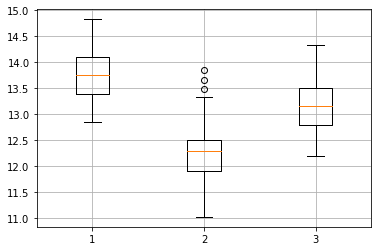

In [8]:
classes = np.unique(df['class'])
print('classes : ', classes)

alcohol_by_class = [df['alcohol'][df['class'] == c] for c in classes]

pl.boxplot(alcohol_by_class)
pl.grid()

dataframes have a [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function that does per-class plotting with the *by* parameter :

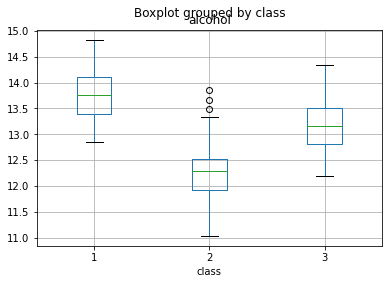

In [9]:
df.boxplot(column='alcohol', by='class');     # the ; at the end makes Python not to print the response of boxplot

We can do that for each column

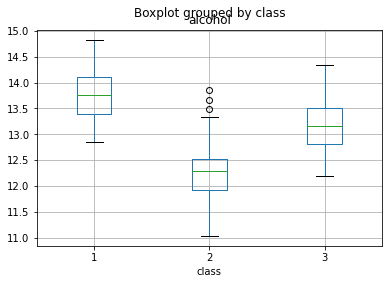

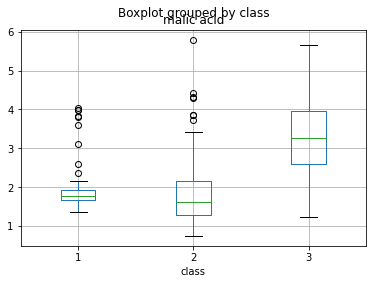

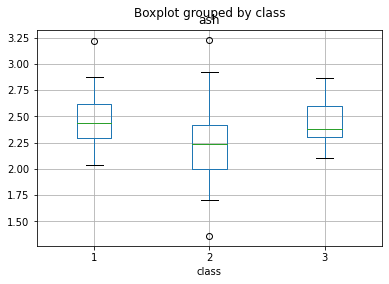

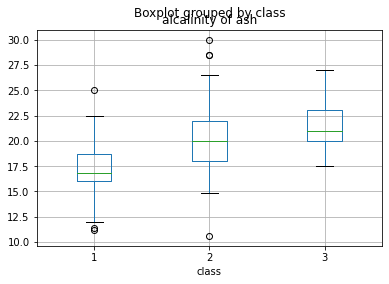

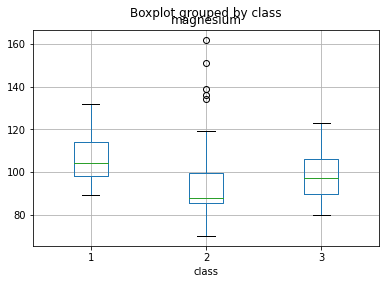

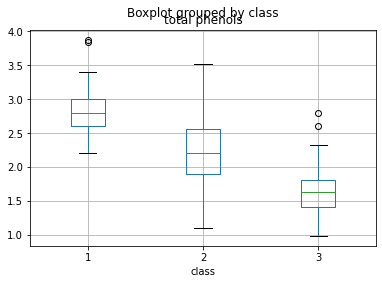

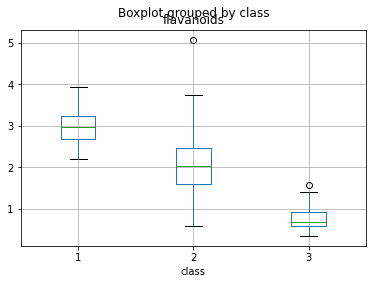

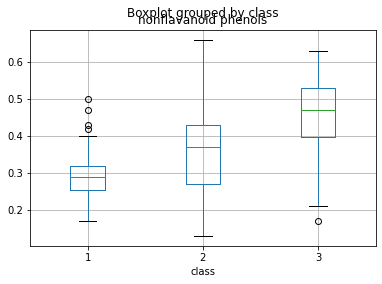

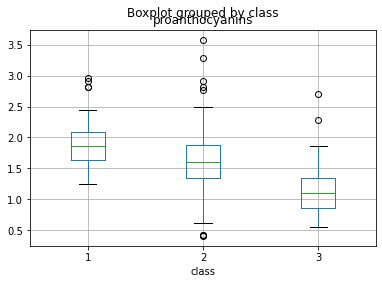

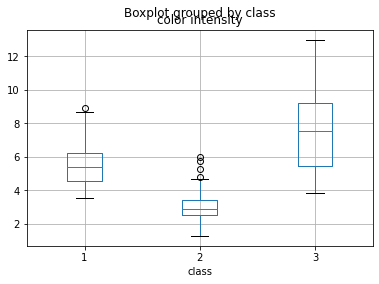

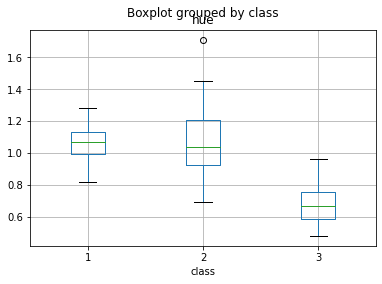

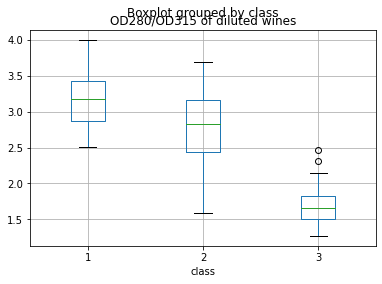

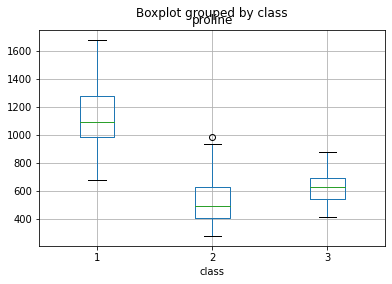

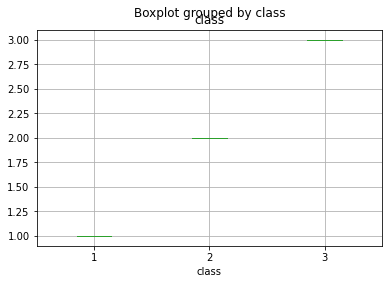

In [10]:
for c in df.columns:
    df.boxplot(column=c, by='class')

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: By looking at the boxplot, which features seem the most discriminative ? (which variables would be helpful to separate the wine classes?)</p>

<p>Alcohol,  total phenols, flavanoids</p>

## 7. Classifying the wine data

Let's first try a rule-based approach to classify the wine data.

Suppose that the <b>alcohol</b> variable allows for a good classification and by observing the corresponding boxplot, let's define the rules that associate a class to alcohol range values.

In [40]:
pred = []

for row in df['alcohol']:
    if row > 13.5:
        pred.append(1);
    elif row > 12.75 and row < 13.5 :
        pred.append(2);    
    else:
        pred.append(3)

# A new column is added to the dataframe
df['prediction'] = pred

In [39]:
df

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class,prediction
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,3,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,3,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,3,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,3,2


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Can you estimate the performance of such a classification method ?</p>

<b>Hint:</b> Divide the number of times the prediction value corresponds to the real one (e.g., how many times, class == prediction ?), by the total number of observations.  

In [281]:
df
goodPredictions = len(df.loc[(df['class'] == df['prediction'])].index)
print("performance (%):")
goodPredictions / len(df.index)


performance (%):
     alcohol  malic acid   ash  alcalinity of ash  magnesium  total phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid phen

## 8. Performance evaluation

#### Confusion matrix, precision, recall and F-score

A <b>confusion matrix</b> is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In the confusion matrix all correct guesses are located in the diagonal of the table, so it's easy to visually inspect the table for errors, as they will be represented by values outside the diagonal.

For an example, please see the Wikipedia page: https://en.wikipedia.org/wiki/Confusion_matrix

Behind the confusion matrix are the following concepts:

<b>true positives (TP)</b>: These are cases in which we predicted correctly the positive class (e.g. the person has a disease and has been diagnosed as sick).

<b>true negatives (TN):</b> We correctly predicted the negative class (e.g. the person is healthy and has not been diagnosed as sick).

<b>false positives (FP):</b> We wrongly predicted the positive class (e.g. the person don't actually have the disease but has been diagnosed as sick). (Also known as a "Type I error.")

<b>false negatives (FN):</b> We wrongly predicted the negative class (e.g. the person is diagnosed as healthy but actually is sick). (Also known as a "Type II error.")

<b>precision</b>: When we predict the positive class, how often are we correct?<p>

<font color="red">precision = tp/(tp + fp)</font>

Sensitivity and specificity are statistical measures of the performance of a binary classification test, also known in statistics as classification function:

<b>Recall or sensitivity</b> (also called the true positive rate or probability of detection in some fields) measures the proportion of positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).<p>

<font color="red">recall = tp/(tp + fn)</font>

<b>Specificity</b> (also called the true negative rate) measures the proportion of negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).

<font color="red">specificity = tn/(tn + fp)</font>

The <b>F1 score</b> can be interpreted as a weighted average of precision and recall, where an F1 score reaches its best value at 1 and worst at 0.<p>

<font color="red">f1-score = 2 x precision x recall / ( precision + recall)</font>


In [58]:
# This function generates a colored confusion matrix.

import matplotlib.cm as cm

def plot_confusion_matrix(confmat, labels_names, ax=None):
    if ax is None:
        ax = pl.subplot(111)
    cmim = ax.matshow(confmat, interpolation='nearest', cmap=cm.jet)

    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.annotate(str(confmat[i, j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center',
                        fontsize=8)
    ax.set_xticks(np.arange(confmat.shape[0]))
    ax.set_xticklabels([labels_names[l] for l in range(confmat.shape[0])], rotation='vertical')
    ax.set_yticks(np.arange(confmat.shape[1]))
    _ = ax.set_yticklabels([labels_names[l] for l in range(confmat.shape[1])])
    ax.set_xlabel('predicted label')
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('true label')
    pl.colorbar(cmim, shrink=0.7, orientation='horizontal', pad=0.01)

              precision    recall  f1-score   support

           1       0.75      0.69      0.72        59
           2       0.16      0.11      0.13        71
           3       0.15      0.23      0.18        48

    accuracy                           0.34       178
   macro avg       0.35      0.35      0.34       178
weighted avg       0.35      0.34      0.34       178



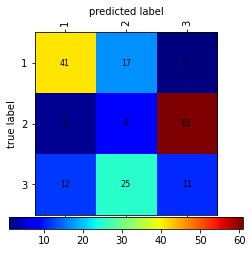

In [59]:
import sklearn.metrics as skmetrics

labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=df['class'], y_pred=df['prediction'])
#plot_confusion_matrix(C, labels_names)

print(skmetrics.classification_report(y_true=df['class'], y_pred=df['prediction']))

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Define a rule that uses the most discriminative feature to classify the wine observations ?</p>

<p> As seen previously, "Alcohol is a bad bet", let's try with the two others</p>

# total phenols

In [ ]:
df.plot

In [66]:
df.groupby('class').describe()["total phenols"]

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
1,59.0,2.840169,0.338961,2.20,2.6000,2.800,3.0000,3.88
2,71.0,2.258873,0.545361,1.10,1.8950,2.200,2.5600,3.52
3,48.0,1.678750,0.356971,0.98,1.4075,1.635,1.8075,2.80


In [ ]:
pred = []

for row in df['total phenols']:
    if row > 2.6:
        pred.append(1);
    elif row > 2.1 and row < 2.6 :
        pred.append(2);    
    else:
        pred.append(3)

# A new column is added to the dataframe
df['prediction'] = pred
df

              precision    recall  f1-score   support

           1       0.72      0.73      0.72        59
           2       0.61      0.32      0.42        71
           3       0.55      0.92      0.69        48

    accuracy                           0.62       178
   macro avg       0.62      0.66      0.61       178
weighted avg       0.63      0.62      0.59       178



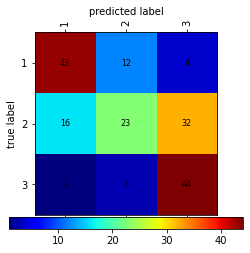

In [71]:
C = skmetrics.confusion_matrix(y_true=df['class'], y_pred=df['prediction'])
plot_confusion_matrix(C, labels_names)

print(skmetrics.classification_report(y_true=df['class'], y_pred=df['prediction']))

# flavanoids 

In [70]:
df.groupby('class').describe()["flavanoids"]

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
1,59.0,2.982373,0.397494,2.19,2.680,2.980,3.245,3.93
2,71.0,2.080845,0.705701,0.57,1.605,2.030,2.475,5.08
3,48.0,0.781458,0.293504,0.34,0.580,0.685,0.920,1.57


In [85]:
pred = []

for row in df['flavanoids']:
    if row > 2.4:
        pred.append(1);
    elif row > 1.4 and row < 2.4 :
        pred.append(2);    
    else:
        pred.append(3)
        # A new column is added to the dataframe
df['prediction'] = pred
df

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class,prediction
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,3,3
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,3,3
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,3,3
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,3,3


              precision    recall  f1-score   support

           1       0.75      0.95      0.84        59
           2       0.91      0.59      0.72        71
           3       0.82      0.98      0.90        48

    accuracy                           0.81       178
   macro avg       0.83      0.84      0.82       178
weighted avg       0.83      0.81      0.80       178



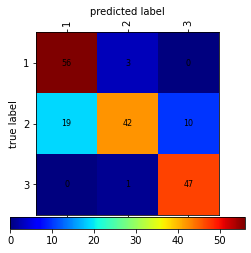

In [86]:
C = skmetrics.confusion_matrix(y_true=df['class'], y_pred=df['prediction'])
plot_confusion_matrix(C, labels_names)

print(skmetrics.classification_report(y_true=df['class'], y_pred=df['prediction']))

## Results

The best feature I could fine in a short time is "flavanoids"

## 9. Try a simple machine learning classifier

In [89]:
df.describe()

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class,prediction
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202,1.898876
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035,0.857601
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000,3.000000


### Standardization
As you can see from the df.describe() above, the range values for each column in our dataset varies a lot. Depending on the model you want to use, that can be a big problem.

The model we'll use here is k-Nearest Neighbor with the Euclidean distance. When using the Euclidean distance, it is important to think about how to preprocess your data.

For example, look at the 'magnesium' and 'total phenols' columns. The standard deviation for magnesium is 14 while for total phenols it is 0.62. This means that the data are more spread out on the magnesium axis compared to the phenols axis. And if we use raw values to compute distances, the magnesium axis will be much more important than the phenols axis, but this importance will just be due to the (arbitrary) scales that we used to measure magnesium and phenols.

In [16]:
print(df['magnesium'].describe())
print(df['total phenols'].describe())

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64
count    178.000000
mean       2.295112
std        0.625851
min        0.980000
25%        1.742500
50%        2.355000
75%        2.800000
max        3.880000
Name: total phenols, dtype: float64


To make the distances less dependent on particular scales, we can standardize our data by making sure each column has 0 mean and unit variance, using [sklearn.preprocessing.scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) or by computing the normalization ourselves.

In [220]:
from sklearn.preprocessing import scale

# all variables of the dataset with normalization
#X = scale(df[colnames[1:]])

# some selected variables without normalization
X = scale(df[['magnesium', 'total phenols']].values)

y = df['class'].values

### Preparing the datasets for cross-validation: Train/test split
To build and evaluate a machine learning model, we need to split our data into training and testing sets. Scikit-learn has a [cross_validation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) module that helps with this task.

In [274]:
from sklearn.model_selection import train_test_split
# train and test are indices arrays containing the indices of train/test samples
train, test = train_test_split(
    np.arange(X.shape[0]), test_size=0.4, random_state=42 # we fix a random state for reproducibility
)

print('train shape : ', train.shape)
print('test shape  : ', test.shape)


train shape :  106
test shape  :  (72,)


### Classifying the wine data
We will use a k-Nearest Neighbor classifier. This classifier will classify a new sample by assigning it the class of its nearest neighbor (for k=1). It computes the distance between the new sample and all the samples in the training set, find the nearest training sample and then use the class of the nearest neighbor to classify the new sample.

The [scipy.spatial.distance](http://docs.scipy.org/doc/scipy/reference/spatial.distance.html) module helps with distance computation

In [222]:
def norm(x):
    return np.sqrt(x.dot(x))

def euclidean_distance(x1, x2):
    '''Euclidean distance'''
    return norm(x1 - x2)

def distances(X_train, x):
    '''
    Returns a vector containing the distance between x and each
    sample in X_train
    '''
    n_train = X_train.shape[0]
    return np.array([euclidean_distance(X_train[i,:], x) for i in range(n_train)])

def nn_classify_k(X_train, y_train, X, k):
    '''
    Nearest neighbor classifier. Returns the class of the nearest training vector
    '''
    dists = distances(X_train, X)
    closests = np.argpartition(dists, k)
    return  np.bincount(y_train[closests[:k]]).argmax()

def nn_classify(X_train, y_train, X, k):
    '''
    Assign to each row in X the class of its nearest neighbor in X_train
    '''
    y_pred = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        y_pred[i] = nn_classify_k(X_train, y_train, X[i], k)
    return y_pred

In [223]:
y_test_pred = nn_classify(X[train], y[train], X[test], 1)
print('y_true : ', y[test])
print('y_pred : ', y_test_pred)

y_true :  [1 1 3 1 2 1 2 3 2 3 1 3 1 2 1 2 2 2 1 2 1 2 2 3 3 3 2 2 2 1 1 2 3 1 1 1 3
 3 2 3 1 2 2 2 3 1 2 2 3 1 2 1 1 3 3 2 2 1 2 1 3 2 2 3 1 1 1 3 1 1 2 3]
y_pred :  [1 1 3 1 2 1 2 2 1 3 1 3 3 2 1 2 2 2 2 2 1 2 2 2 2 3 3 1 2 1 2 3 3 1 2 1 1
 3 2 2 1 1 3 1 3 2 2 3 3 1 2 2 1 3 2 2 2 1 2 1 2 2 2 2 2 1 1 3 1 1 2 3]


              precision    recall  f1-score   support

           1       0.76      0.85      0.80        26
           2       0.62      0.74      0.68        27
           3       0.91      0.53      0.67        19

    accuracy                           0.72        72
   macro avg       0.76      0.70      0.71        72
weighted avg       0.75      0.72      0.72        72



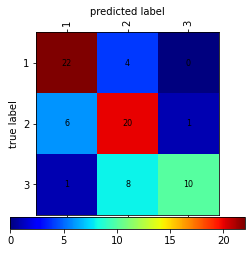

In [273]:
labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=y[test], y_pred=y_test_pred)
plot_confusion_matrix(C, labels_names)

print(skmetrics.classification_report(y_true=y[test], y_pred=y_test_pred))

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Now, normalize (scale) the columns of your data matrix and re-run the classification. What do you observe ?</p>

In [216]:
X = scale(df[['flavanoids', 'total phenols']].values)
y = df['class'].values

In [217]:
# train and test are indices arrays containing the indices of train/test samples
train, test = train_test_split(
    np.arange(X.shape[0]), test_size=0.4, random_state=42 # we fix a random state for reproducibility
)

print('train shape : ', train.shape)
print('test shape  : ', test.shape)

train shape :  (106,)
test shape  :  (72,)


In [218]:
y_test_pred = nn_classify(X[train], y[train], X[test], 1)
print('y_true : ', y[test])
print('y_pred : ', y_test_pred)

y_true :  [1 1 3 1 2 1 2 3 2 3 1 3 1 2 1 2 2 2 1 2 1 2 2 3 3 3 2 2 2 1 1 2 3 1 1 1 3
 3 2 3 1 2 2 2 3 1 2 2 3 1 2 1 1 3 3 2 2 1 2 1 3 2 2 3 1 1 1 3 1 1 2 3]
y_pred :  [1 2 3 1 2 1 2 3 1 3 2 2 1 3 2 1 2 2 1 1 1 1 3 3 3 3 2 1 2 1 1 2 3 2 1 1 2
 3 1 3 1 2 2 2 3 1 2 2 3 1 2 1 2 3 3 2 2 2 2 1 3 1 2 3 2 1 2 3 2 1 1 3]


              precision    recall  f1-score   support

           1       0.68      0.65      0.67        26
           2       0.61      0.63      0.62        27
           3       0.89      0.89      0.89        19

    accuracy                           0.71        72
   macro avg       0.73      0.73      0.73        72
weighted avg       0.71      0.71      0.71        72



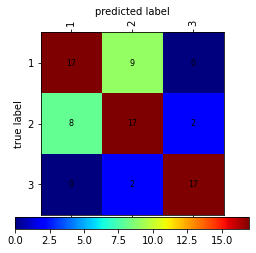

In [219]:

C = skmetrics.confusion_matrix(y_true=y[test], y_pred=y_test_pred)
plot_confusion_matrix(C, labels_names)

print(skmetrics.classification_report(y_true=y[test], y_pred=y_test_pred))

Both normalized: 51 vs 49

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Above, we implemented a basic nearest neighbor classifier (k=1). Modify it so that it is a k nearest neighbor classifier. Evaluate it for k=3, k=5 and k=10. Does increasing k help ? Is there a limit after which increasing k is useless ? Why ?</p>

In [252]:
def some_knn(k):
    train, test = train_test_split(
        np.arange(X.shape[0]), test_size=0.4, random_state=42 # we fix a random state for reproducibility
    )

    y_test_pred = nn_classify(X[train], y[train], X[test], k)
    C = skmetrics.confusion_matrix(y_true=y[test], y_pred=y_test_pred)
    plot_confusion_matrix(C, labels_names)

    print(skmetrics.classification_report(y_true=y[test], y_pred=y_test_pred))
    
    correctNb = 0
    for x in range(len(C)):
        correctNb += C[x, x]
    print("Nb correct : " + str(correctNb))   
            

              precision    recall  f1-score   support

           1       0.79      0.73      0.76        26
           2       0.59      0.70      0.64        27
           3       0.69      0.58      0.63        19

    accuracy                           0.68        72
   macro avg       0.69      0.67      0.68        72
weighted avg       0.69      0.68      0.68        72

Nb correct : 49


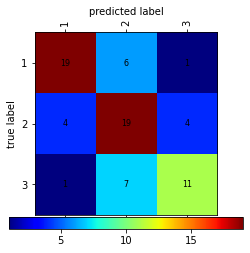

In [253]:

some_knn(1)

              precision    recall  f1-score   support

           1       0.79      0.85      0.81        26
           2       0.61      0.63      0.62        27
           3       0.69      0.58      0.63        19

    accuracy                           0.69        72
   macro avg       0.69      0.68      0.69        72
weighted avg       0.69      0.69      0.69        72

Nb correct : 50


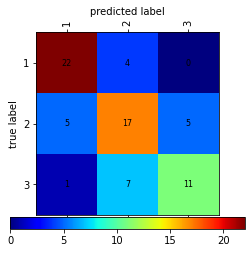

In [257]:
some_knn(3)

              precision    recall  f1-score   support

           1       0.79      0.88      0.84        26
           2       0.62      0.67      0.64        27
           3       0.71      0.53      0.61        19

    accuracy                           0.71        72
   macro avg       0.71      0.69      0.70        72
weighted avg       0.71      0.71      0.70        72

Nb correct : 51


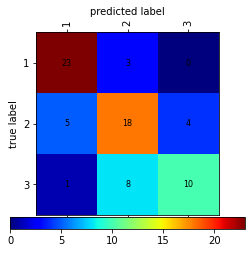

In [256]:
some_knn(5)

              precision    recall  f1-score   support

           1       0.76      0.85      0.80        26
           2       0.62      0.74      0.68        27
           3       0.91      0.53      0.67        19

    accuracy                           0.72        72
   macro avg       0.76      0.70      0.71        72
weighted avg       0.75      0.72      0.72        72

Nb correct : 52


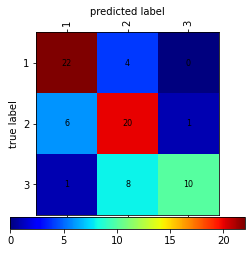

In [259]:
some_knn(10)

              precision    recall  f1-score   support

           1       0.79      0.85      0.81        26
           2       0.68      0.70      0.69        27
           3       0.81      0.68      0.74        19

    accuracy                           0.75        72
   macro avg       0.76      0.74      0.75        72
weighted avg       0.75      0.75      0.75        72

Nb correct : 54


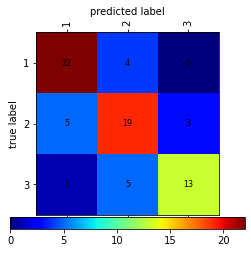

In [261]:
some_knn(15)

              precision    recall  f1-score   support

           1       0.72      0.81      0.76        26
           2       0.55      0.63      0.59        27
           3       0.75      0.47      0.58        19

    accuracy                           0.65        72
   macro avg       0.67      0.64      0.64        72
weighted avg       0.67      0.65      0.65        72

Nb correct : 47


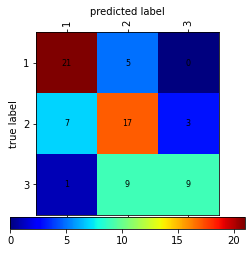

In [270]:
some_knn(20)

We are gaining precision until 15 and then we are losing it.

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: In our example, we only used two features (magnesium and total phenols). Try classifying with all the features and compare the performance.</p>

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        26
           2       1.00      0.81      0.90        27
           3       0.95      1.00      0.97        19

    accuracy                           0.93        72
   macro avg       0.94      0.94      0.93        72
weighted avg       0.94      0.93      0.93        72

Nb correct : 67


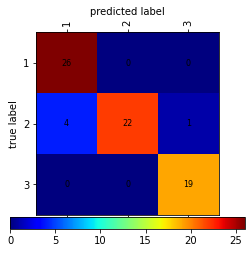

In [280]:
X = scale(df[colnames[1:]])
y = df['class'].values
some_knn(1)

52 vs 67 the performance is better with all the feature